In [7]:
import os
import sys
import subprocess
import numpy as np
# import glob
import json
import pandas as pd
import shutil
import librosa.display
# from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import csv
import IPython.display as ipd
import random

In [2]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kimsunhee","key":"5d873ecbd75fa0fb5ee4a42d5e533f5d"}'}

In [3]:
ls -1ha kaggle.json

kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         50           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes         78           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        554           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        107           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1120           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      13364           False  
house-pr

In [5]:
!kaggle datasets download -d sarabhian/coswara-dataset-heavy-cough

100% 630M/632M [00:27<00:00, 20.3MB/s]
100% 632M/632M [00:27<00:00, 24.5MB/s]


In [6]:
ls

coswara-dataset-heavy-cough.zip  kaggle.json  sample_data/


In [7]:
!unzip coswara-dataset-heavy-cough.zip

Archive:  coswara-dataset-heavy-cough.zip
  inflating: coswara_data/kaggle_data/00xKcQMmcAhX8CODgBBLOe7Dm0T2/cough.wav  
  inflating: coswara_data/kaggle_data/01OCEf1yB4czsq8ygRoT51s96Ba2/cough.wav  
  inflating: coswara_data/kaggle_data/01n0u9YSkXQSkmN45J65eigyCMC3/cough.wav  
  inflating: coswara_data/kaggle_data/03TmwzsdEBVEh35MRMbC9d0NnfI3/cough.wav  
  inflating: coswara_data/kaggle_data/05acPS4aRGfvuOfku11Za8zve8i2/cough.wav  
  inflating: coswara_data/kaggle_data/05bieNLXPuaIWEVaX81EkbbjVrh1/cough.wav  
  inflating: coswara_data/kaggle_data/08tlSbvXpAggZavIGW994adhh1m1/cough.wav  
  inflating: coswara_data/kaggle_data/0B1rE91KabdId1lUmWJB7NLg8OP2/cough.wav  
  inflating: coswara_data/kaggle_data/0EAAFsDWfTcrhktHy78LS6nf19G3/cough.wav  
  inflating: coswara_data/kaggle_data/0HIgO2EhOOW1msCbEw1kC8Qsx6D3/cough.wav  
  inflating: coswara_data/kaggle_data/0Ha52POVIxTKEPqI1eGpIoMHUd52/cough.wav  
  inflating: coswara_data/kaggle_data/0Js6ZUZQ9NUnu568Fh7B6mZ1R8o1/cough.wav  
  inflatin

In [8]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
!cp -r /content/drive/MyDrive/Colab Notebooks/sesac /csvs

cp: target '/csvs' is not a directory


In [10]:
data_path = "/content/coswara_data/kaggle_data"
csvs_path = "./csvs"

In [11]:
hcough_files =[]
for dirpath, subdirs, files in os.walk(data_path):
#     print(files)
    hcough_files.extend(os.path.join(dirpath, x) for x in files if os.path.isfile(os.path.join(dirpath, x)))
print("total files :" ,len(hcough_files)) 
print("path of file at loc [0] :" ,hcough_files[0]) # path of file
print("id of file at loc[0]",hcough_files[0][-38:-10] )# id of each file

dff = pd.DataFrame(columns=['id','path'])
dff['path']=hcough_files 
dff['id'] = dff.path.apply(lambda x: x[-38:-10])
dff.head()

total files : 2313
path of file at loc [0] : /content/coswara_data/kaggle_data/PWXapCML3JSGefaCRAxKjCNp0Ps2/cough.wav
id of file at loc[0] PWXapCML3JSGefaCRAxKjCNp0Ps2


id  \
0  PWXapCML3JSGefaCRAxKjCNp0Ps2   
1  CEn02KlCBsUgUqUmf5BfUgaITG33   
2  naPVzGoHqwfHo3PNVfoNxMpR7qU2   
3  lRsw8buO7jQSHGzSWIOPW5JboM82   
4  OK2CZltrvfZbpTWB75LWMFqxfpM2   

                                                path  
0  /content/coswara_data/kaggle_data/PWXapCML3JSG...  
1  /content/coswara_data/kaggle_data/CEn02KlCBsUg...  
2  /content/coswara_data/kaggle_data/naPVzGoHqwfH...  
3  /content/coswara_data/kaggle_data/lRsw8buO7jQS...  
4  /content/coswara_data/kaggle_data/OK2CZltrvfZb...

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
data = librosa.load(dff.path.loc[1],sr = 22050)
ipd.Audio(dff.path.loc[1])

In [14]:
csv_files =[]
for dirpath, subdirs, files in os.walk(csvs_path):
    csv_files.extend(os.path.join(dirpath, x) for x in files if x.endswith(".csv"))
csv_files

['./csvs/20210816.csv',
 './csvs/20201012.csv',
 './csvs/20201031.csv',
 './csvs/20210523.csv',
 './csvs/20210630.csv',
 './csvs/20200820.csv',
 './csvs/20200424.csv',
 './csvs/20200604.csv',
 './csvs/20210603.csv',
 './csvs/20200720.csv',
 './csvs/20200430.csv',
 './csvs/20200930.csv',
 './csvs/20200814.csv',
 './csvs/20200505.csv',
 './csvs/20201130.csv',
 './csvs/20200911.csv',
 './csvs/20220116.csv',
 './csvs/20210406.csv',
 './csvs/20200707.csv',
 './csvs/20200502.csv',
 './csvs/20200416.csv',
 './csvs/20210426.csv',
 './csvs/20210914.csv',
 './csvs/20201221.csv',
 './csvs/20200919.csv',
 './csvs/20200525.csv',
 './csvs/20210618.csv',
 './csvs/20200803.csv',
 './csvs/20210830.csv',
 './csvs/20210507.csv',
 './csvs/20200901.csv',
 './csvs/20200419.csv',
 './csvs/20210930.csv',
 './csvs/20210714.csv',
 './csvs/20200417.csv',
 './csvs/20210419.csv',
 './csvs/20200418.csv',
 './csvs/20210206.csv',
 './csvs/20200824.csv',
 './csvs/20200413.csv',
 './csvs/20200415.csv',
 './csvs/2020050

In [15]:
pwd

'/content'

In [16]:
print("total present csvs :", len(os.listdir(csvs_path)))

total present csvs : 42


In [17]:
all_files=[]
for files in os.listdir(csvs_path):
    if files[-3:]=="csv":
        all_files.append(files)
all_files.sort()
all_files

['20200413.csv',
 '20200415.csv',
 '20200416.csv',
 '20200417.csv',
 '20200418.csv',
 '20200419.csv',
 '20200424.csv',
 '20200430.csv',
 '20200502.csv',
 '20200504.csv',
 '20200505.csv',
 '20200525.csv',
 '20200604.csv',
 '20200707.csv',
 '20200720.csv',
 '20200803.csv',
 '20200814.csv',
 '20200820.csv',
 '20200824.csv',
 '20200901.csv',
 '20200911.csv',
 '20200919.csv',
 '20200930.csv',
 '20201012.csv',
 '20201031.csv',
 '20201130.csv',
 '20201221.csv',
 '20210206.csv',
 '20210406.csv',
 '20210419.csv',
 '20210426.csv',
 '20210507.csv',
 '20210523.csv',
 '20210603.csv',
 '20210618.csv',
 '20210630.csv',
 '20210714.csv',
 '20210816.csv',
 '20210830.csv',
 '20210914.csv',
 '20210930.csv',
 '20220116.csv']

In [18]:
os.chdir(csvs_path)

df_list =[]
for i in range(len(all_files)):
    temp_df = pd.read_csv(all_files[i])
    df_list.append(temp_df)
df = pd.concat(df_list, ignore_index=True, sort=False)
df.head()

id    l_c   a record_date covid_status    iF ep  \
0  vK2bLRNzllXNeyOMudnNSL5cfpG2  India  24  2020-04-13      healthy  True  y   
1  bjA2KpSxneNskrLBeqi4bqoTDQl2  India  72  2020-04-13      healthy  True  y   
2  FSzobvJqOXf0rI6X05cHqOiU9Mu2  India  54  2020-04-13      healthy  True  y   
3  EqDWckxbsETyHUeBLQ8jLtxlhir2  India  31  2020-04-13      healthy  True  y   
4  FGRDO4IBbAejR0WHD5YbkXTCasg2  India  26  2020-04-13      healthy  True  y   

      g          l_s   dT  ... test_status diarrhoea ctScan vacc testType  \
0  male    Karnataka  web  ...         NaN       NaN    NaN  NaN      NaN   
1  male  Maharashtra  web  ...         NaN       NaN    NaN  NaN      NaN   
2  male  Maharashtra  web  ...         NaN       NaN    NaN  NaN      NaN   
3  male    Karnataka  web  ...         NaN       NaN    NaN  NaN      NaN   
4  male      Haryana  web  ...         NaN       NaN    NaN  NaN      NaN   

  test_date others_preexist ctDate ctScore  others_resp  
0       NaN             NaN    NaN     NaN          NaN  
1       NaN             NaN    NaN     NaN          NaN  
2       NaN             NaN    NaN     NaN          NaN  
3       NaN             NaN    NaN     NaN          NaN  
4       NaN             NaN    NaN     NaN          NaN  

[5 rows x 41 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374 entries, 0 to 2373
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2374 non-null   object 
 1   l_c              2374 non-null   object 
 2   a                2374 non-null   int64  
 3   record_date      2374 non-null   object 
 4   covid_status     2374 non-null   object 
 5   iF               76 non-null     object 
 6   ep               2374 non-null   object 
 7   g                2374 non-null   object 
 8   l_s              2374 non-null   object 
 9   dT               1770 non-null   object 
 10  l_l              2113 non-null   object 
 11  diabetes         196 non-null    object 
 12  asthma           119 non-null    object 
 13  smoker           714 non-null    object 
 14  ht               193 non-null    object 
 15  fever            264 non-null    object 
 16  date             604 non-null    object 
 17  cld           

In [20]:
df['str_date']=pd.to_datetime(df['record_date'])
df['date']=df['str_date'].dt.strftime('%Y%m%d')
df.head(10)

id     l_c   a record_date  \
0  vK2bLRNzllXNeyOMudnNSL5cfpG2   India  24  2020-04-13   
1  bjA2KpSxneNskrLBeqi4bqoTDQl2   India  72  2020-04-13   
2  FSzobvJqOXf0rI6X05cHqOiU9Mu2   India  54  2020-04-13   
3  EqDWckxbsETyHUeBLQ8jLtxlhir2   India  31  2020-04-13   
4  FGRDO4IBbAejR0WHD5YbkXTCasg2   India  26  2020-04-13   
5  htQzROl26OWQpIYFDzv11F79PLR2   India  24  2020-04-13   
6  pW9mCAeWYiMoM7wW7riLvNRbYDO2   India  37  2020-04-13   
7  Eu11s84cuBTiPXTAtVf9mj3GkqA2  Canada  23  2020-04-13   
8  L7S8iIPKgiO6QWLC3mGkROCMa0s1   India  40  2020-04-13   
9  eP8gEM0KcBU6S5JpMdycX74KP3p2   India  32  2020-04-13   

                  covid_status    iF ep     g          l_s   dT  ...  \
0                      healthy  True  y  male    Karnataka  web  ...   
1                      healthy  True  y  male  Maharashtra  web  ...   
2                      healthy  True  y  male  Maharashtra  web  ...   
3                      healthy  True  y  male    Karnataka  web  ...   
4                      healthy  True  y  male      Haryana  web  ...   
5                      healthy  True  y  male    Karnataka  web  ...   
6                      healthy  True  y  male  Maharashtra  web  ...   
7                      healthy  True  y  male      Ontario  web  ...   
8  resp_illness_not_identified  True  y  male      Gujarat  web  ...   
9                      healthy  True  y  male    Telangana  web  ...   

  diarrhoea ctScan vacc testType test_date others_preexist ctDate ctScore  \
0       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
1       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
2       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
3       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
4       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
5       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
6       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
7       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
8       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
9       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   

  others_resp   str_date  
0         NaN 2020-04-13  
1         NaN 2020-04-13  
2         NaN 2020-04-13  
3         NaN 2020-04-13  
4         NaN 2020-04-13  
5         NaN 2020-04-13  
6         NaN 2020-04-13  
7         NaN 2020-04-13  
8         NaN 2020-04-13  
9         NaN 2020-04-13  

[10 rows x 42 columns]

In [21]:
tdf = pd.merge(dff ,df , on = 'id')
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 0 to 2311
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               2312 non-null   object        
 1   path             2312 non-null   object        
 2   l_c              2312 non-null   object        
 3   a                2312 non-null   int64         
 4   record_date      2312 non-null   object        
 5   covid_status     2312 non-null   object        
 6   iF               76 non-null     object        
 7   ep               2312 non-null   object        
 8   g                2312 non-null   object        
 9   l_s              2312 non-null   object        
 10  dT               1708 non-null   object        
 11  l_l              2061 non-null   object        
 12  diabetes         194 non-null    object        
 13  asthma           116 non-null    object        
 14  smoker           652 non-null    object 

In [2]:
tdf.head()

NameError: ignored

In [23]:
tdf.to_csv('tdf.csv',index=False)

In [131]:
tdf=pd.read_csv('/content/csvs/tdf.csv')

In [132]:
data = librosa.load(tdf.path.loc[1343],sr =22050)
ipd.Audio(tdf['path'].loc[1343])

In [133]:
df = tdf.copy()
df['status']=0
for i in range(0,2312):
    if ((df.covid_status.loc[i]!='positive_mild') or (df.covid_status.loc[i]!='positive_moderate') or (df.covid_status.loc[i]!='positive_asymp')):
        df["status"].loc[i]='negative'
    
    if ((df.covid_status.loc[i]=='positive_mild') or (df.covid_status.loc[i]=='positive_moderate') or (df.covid_status.loc[i]=='positive_asymp')):
        df["status"].loc[i]='positive' 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [134]:
df["status"]!='positive' 

0        True
1        True
2        True
3       False
4        True
        ...  
2307     True
2308     True
2309     True
2310     True
2311     True
Name: status, Length: 2312, dtype: bool

In [135]:
df[df['status']=='negative'].count()

id                 1829
path               1829
l_c                1829
a                  1829
record_date        1829
covid_status       1829
iF                   76
ep                 1829
g                  1829
l_s                1829
dT                 1226
l_l                1621
diabetes            111
asthma              106
smoker              353
ht                  122
fever                52
date               1829
cld                  34
ihd                  16
fV                 1150
rU                 1150
cold                122
cough               156
test                  1
loss_of_smell        23
pneumonia            32
um                  794
bd                   91
st                   56
ftg                  60
mp                   59
test_status         511
diarrhoea             6
ctScan              236
vacc                236
testType            147
test_date           147
others_preexist      55
ctDate               50
ctScore              50
others_resp     

In [136]:
df[df['status']=='positive'].count()

id                 483
path               483
l_c                483
a                  483
record_date        483
covid_status       483
iF                   0
ep                 483
g                  483
l_s                483
dT                 482
l_l                440
diabetes            83
asthma              10
smoker             299
ht                  69
fever              196
date               483
cld                  4
ihd                 10
fV                 482
rU                 482
cold               195
cough              265
test                 0
loss_of_smell      110
pneumonia           12
um                 480
bd                  84
st                 131
ftg                179
mp                 153
test_status        388
diarrhoea           34
ctScan             293
vacc               293
testType           293
test_date          293
others_preexist     28
ctDate              84
ctScore             84
others_resp         11
str_date           483
status     

In [137]:
negative_df= df[df['status'] == 'negative'][0:483]
negative_df

id  \
0    PWXapCML3JSGefaCRAxKjCNp0Ps2   
1    CEn02KlCBsUgUqUmf5BfUgaITG33   
2    naPVzGoHqwfHo3PNVfoNxMpR7qU2   
4    OK2CZltrvfZbpTWB75LWMFqxfpM2   
5    iKztabb0gWfeagEyYuU3US36u9b2   
..                            ...   
594  gkgap61ehlgkpjvtbEm1EVbhv8j1   
595  4pzyamXuTgfmgVGi39RXWSfNb213   
596  GzhrTQhWHSTwvweRKx2x1Uh4wx52   
598  t6twqoKKSMOJdmehEj2gbVo6Lao2   
599  VxQekDvwa3N5B2FqB4FlQ5jBjTp2   

                                                  path    l_c   a record_date  \
0    /content/coswara_data/kaggle_data/PWXapCML3JSG...  India  54  2020-04-26   
1    /content/coswara_data/kaggle_data/CEn02KlCBsUg...  India  44  2020-08-11   
2    /content/coswara_data/kaggle_data/naPVzGoHqwfH...  India  28  2021-04-14   
4    /content/coswara_data/kaggle_data/OK2CZltrvfZb...  India  47  2020-05-04   
5    /content/coswara_data/kaggle_data/iKztabb0gWfe...  India  30  2020-08-13   
..                                                 ...    ...  ..         ...   
594  /content/coswara_data/kaggle_data/gkgap61ehlgk...  India  54  2020-04-17   
595  /content/coswara_data/kaggle_data/4pzyamXuTgfm...  India  56  2021-06-09   
596  /content/coswara_data/kaggle_data/GzhrTQhWHSTw...  India  35  2020-04-24   
598  /content/coswara_data/kaggle_data/t6twqoKKSMOJ...  India  20  2020-08-27   
599  /content/coswara_data/kaggle_data/VxQekDvwa3N5...  India  40  2020-05-02   

                    covid_status   iF ep       g          l_s  ... ctScan  \
0                        healthy  NaN  y  female       Kerala  ...    NaN   
1                        healthy  NaN  y    male    Karnataka  ...    NaN   
2        no_resp_illness_exposed  NaN  y  female  Maharashtra  ...    NaN   
4                        healthy  NaN  y    male   Tamil Nadu  ...    NaN   
5    resp_illness_not_identified  NaN  n    male    Karnataka  ...    NaN   
..                           ...  ... ..     ...          ...  ...    ...   
594                      healthy  NaN  y    male       Kerala  ...    NaN   
595                      healthy  NaN  n  female    Telangana  ...      n   
596                      healthy  NaN  y    male    Karnataka  ...    NaN   
598                      healthy  NaN  y    male    Telangana  ...    NaN   
599                      healthy  NaN  y    male    Karnataka  ...    NaN   

    vacc testType test_date others_preexist ctDate ctScore  others_resp  \
0    NaN      NaN       NaN             NaN    NaN     NaN          NaN   
1    NaN      NaN       NaN             NaN    NaN     NaN          NaN   
2    NaN      NaN       NaN             NaN    NaN     NaN          NaN   
4    NaN      NaN       NaN             NaN    NaN     NaN          NaN   
5    NaN      NaN       NaN             NaN    NaN     NaN          NaN   
..   ...      ...       ...             ...    ...     ...          ...   
594  NaN      NaN       NaN             NaN    NaN     NaN          NaN   
595    n      NaN       NaN             NaN    NaN     NaN          NaN   
596  NaN      NaN       NaN             NaN    NaN     NaN          NaN   
598  NaN      NaN       NaN             NaN    NaN     NaN          NaN   
599  NaN      NaN       NaN             NaN    NaN     NaN          NaN   

       str_date    status  
0    2020-04-26  negative  
1    2020-08-11  negative  
2    2021-04-14  negative  
4    2020-05-04  negative  
5    2020-08-13  negative  
..          ...       ...  
594  2020-04-17  negative  
595  2021-06-09  negative  
596  2020-04-24  negative  
598  2020-08-27  negative  
599  2020-05-02  negative  

[483 rows x 44 columns]

In [138]:
positive_df=df[df['status'] == 'positive']
positive_df

id  \
3     lRsw8buO7jQSHGzSWIOPW5JboM82   
7     VQoZTPYiP1Y9pcCcfBD1yDx5bt62   
15    9Wkd6QJdpBNEosMpzYhFwZjBJX92   
34    dFtGnzYqh1NVAwQUQ3wkysqAe3n1   
36    euld60aqc2OtnNoKYx9P4WDzVM92   
...                            ...   
2277  xsU1zerlMJVwKLSFYtw1sZG3Hau2   
2278  9qTEkN9zyqc9zYKt4qpsgatdTLo2   
2280  ELTqUBJoR4MPBzMZH3yL6yLMc283   
2290  gpcoorcyfuXQZxcUFTxthUKOua03   
2305  IUMKHMLvwOWdQgn7cbonw36vNzF2   

                                                   path    l_c   a  \
3     /content/coswara_data/kaggle_data/lRsw8buO7jQS...  India  33   
7     /content/coswara_data/kaggle_data/VQoZTPYiP1Y9...  India  55   
15    /content/coswara_data/kaggle_data/9Wkd6QJdpBNE...  India  25   
34    /content/coswara_data/kaggle_data/dFtGnzYqh1NV...  India  25   
36    /content/coswara_data/kaggle_data/euld60aqc2Ot...  India  33   
...                                                 ...    ...  ..   
2277  /content/coswara_data/kaggle_data/xsU1zerlMJVw...  India  21   
2278  /content/coswara_data/kaggle_data/9qTEkN9zyqc9...  India  24   
2280  /content/coswara_data/kaggle_data/ELTqUBJoR4MP...  India  30   
2290  /content/coswara_data/kaggle_data/gpcoorcyfuXQ...  India  23   
2305  /content/coswara_data/kaggle_data/IUMKHMLvwOWd...  India  60   

     record_date       covid_status   iF ep       g          l_s  ... ctScan  \
3     2021-07-10      positive_mild  NaN  y    male    Karnataka  ...      n   
7     2021-04-21      positive_mild  NaN  y  female  Maharashtra  ...    NaN   
15    2020-08-20      positive_mild  NaN  y    male    Karnataka  ...    NaN   
34    2021-07-29     positive_asymp  NaN  y    male        Assam  ...      n   
36    2020-09-25      positive_mild  NaN  y  female   Tamil Nadu  ...    NaN   
...          ...                ...  ... ..     ...          ...  ...    ...   
2277  2022-01-09      positive_mild  NaN  y    male    Karnataka  ...      n   
2278  2021-07-19  positive_moderate  NaN  y    male   Tamil Nadu  ...      n   
2280  2021-05-24  positive_moderate  NaN  y    male    Karnataka  ...    NaN   
2290  2020-08-28      positive_mild  NaN  y    male    Rajasthan  ...    NaN   
2305  2021-05-25      positive_mild  NaN  y    male    Karnataka  ...    NaN   

     vacc testType   test_date others_preexist ctDate ctScore  others_resp  \
3       p    rtpcr  2021-07-07             NaN    NaN     NaN          NaN   
7     NaN      NaN         NaN             NaN    NaN     NaN          NaN   
15    NaN      NaN         NaN             NaN    NaN     NaN          NaN   
34      y    rtpcr  2021-07-22             NaN    NaN     NaN          NaN   
36    NaN      NaN         NaN             NaN    NaN     NaN          NaN   
...   ...      ...         ...             ...    ...     ...          ...   
2277    y    rtpcr  2022-01-08             NaN    NaN     NaN          NaN   
2278    n    rtpcr  2021-07-16             NaN    NaN     NaN          NaN   
2280  NaN      NaN         NaN             NaN    NaN     NaN          NaN   
2290  NaN      NaN         NaN             NaN    NaN     NaN          NaN   
2305  NaN      NaN         NaN             NaN    NaN     NaN          NaN   

        str_date    status  
3     2021-07-10  positive  
7     2021-04-21  positive  
15    2020-08-20  positive  
34    2021-07-29  positive  
36    2020-09-25  positive  
...          ...       ...  
2277  2022-01-09  positive  
2278  2021-07-19  positive  
2280  2021-05-24  positive  
2290  2020-08-28  positive  
2305  2021-05-25  positive  

[483 rows x 44 columns]

In [139]:
df = pd.concat([negative_df,positive_df])
df

id  \
0     PWXapCML3JSGefaCRAxKjCNp0Ps2   
1     CEn02KlCBsUgUqUmf5BfUgaITG33   
2     naPVzGoHqwfHo3PNVfoNxMpR7qU2   
4     OK2CZltrvfZbpTWB75LWMFqxfpM2   
5     iKztabb0gWfeagEyYuU3US36u9b2   
...                            ...   
2277  xsU1zerlMJVwKLSFYtw1sZG3Hau2   
2278  9qTEkN9zyqc9zYKt4qpsgatdTLo2   
2280  ELTqUBJoR4MPBzMZH3yL6yLMc283   
2290  gpcoorcyfuXQZxcUFTxthUKOua03   
2305  IUMKHMLvwOWdQgn7cbonw36vNzF2   

                                                   path    l_c   a  \
0     /content/coswara_data/kaggle_data/PWXapCML3JSG...  India  54   
1     /content/coswara_data/kaggle_data/CEn02KlCBsUg...  India  44   
2     /content/coswara_data/kaggle_data/naPVzGoHqwfH...  India  28   
4     /content/coswara_data/kaggle_data/OK2CZltrvfZb...  India  47   
5     /content/coswara_data/kaggle_data/iKztabb0gWfe...  India  30   
...                                                 ...    ...  ..   
2277  /content/coswara_data/kaggle_data/xsU1zerlMJVw...  India  21   
2278  /content/coswara_data/kaggle_data/9qTEkN9zyqc9...  India  24   
2280  /content/coswara_data/kaggle_data/ELTqUBJoR4MP...  India  30   
2290  /content/coswara_data/kaggle_data/gpcoorcyfuXQ...  India  23   
2305  /content/coswara_data/kaggle_data/IUMKHMLvwOWd...  India  60   

     record_date                 covid_status   iF ep       g          l_s  \
0     2020-04-26                      healthy  NaN  y  female       Kerala   
1     2020-08-11                      healthy  NaN  y    male    Karnataka   
2     2021-04-14      no_resp_illness_exposed  NaN  y  female  Maharashtra   
4     2020-05-04                      healthy  NaN  y    male   Tamil Nadu   
5     2020-08-13  resp_illness_not_identified  NaN  n    male    Karnataka   
...          ...                          ...  ... ..     ...          ...   
2277  2022-01-09                positive_mild  NaN  y    male    Karnataka   
2278  2021-07-19            positive_moderate  NaN  y    male   Tamil Nadu   
2280  2021-05-24            positive_moderate  NaN  y    male    Karnataka   
2290  2020-08-28                positive_mild  NaN  y    male    Rajasthan   
2305  2021-05-25                positive_mild  NaN  y    male    Karnataka   

      ... ctScan vacc testType   test_date others_preexist ctDate ctScore  \
0     ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
1     ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
2     ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
4     ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
5     ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
...   ...    ...  ...      ...         ...             ...    ...     ...   
2277  ...      n    y    rtpcr  2022-01-08             NaN    NaN     NaN   
2278  ...      n    n    rtpcr  2021-07-16             NaN    NaN     NaN   
2280  ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
2290  ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
2305  ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   

      others_resp    str_date    status  
0             NaN  2020-04-26  negative  
1             NaN  2020-08-11  negative  
2             NaN  2021-04-14  negative  
4             NaN  2020-05-04  negative  
5             NaN  2020-08-13  negative  
...           ...         ...       ...  
2277          NaN  2022-01-09  positive  
2278          NaN  2021-07-19  positive  
2280          NaN  2021-05-24  positive  
2290          NaN  2020-08-28  positive  
2305          NaN  2021-05-25  positive  

[966 rows x 44 columns]

In [140]:
# df["file_status"]= 0

# for i, row in df.iterrows():
# #for i in range( 0, 965):
#     if os.path.isfile(df["path"].loc[i]):
#         df["file_status"].loc[i]="Y"
#     if not os.path.isfile(df["path"].loc[i]):
#         df["file_status"].loc[i]="N"

In [141]:
Tdf = df[['path','status']]
Tdf

path    status
0     /content/coswara_data/kaggle_data/PWXapCML3JSG...  negative
1     /content/coswara_data/kaggle_data/CEn02KlCBsUg...  negative
2     /content/coswara_data/kaggle_data/naPVzGoHqwfH...  negative
4     /content/coswara_data/kaggle_data/OK2CZltrvfZb...  negative
5     /content/coswara_data/kaggle_data/iKztabb0gWfe...  negative
...                                                 ...       ...
2277  /content/coswara_data/kaggle_data/xsU1zerlMJVw...  positive
2278  /content/coswara_data/kaggle_data/9qTEkN9zyqc9...  positive
2280  /content/coswara_data/kaggle_data/ELTqUBJoR4MP...  positive
2290  /content/coswara_data/kaggle_data/gpcoorcyfuXQ...  positive
2305  /content/coswara_data/kaggle_data/IUMKHMLvwOWd...  positive

[966 rows x 2 columns]

In [144]:
dataset=[]
for i, row in Tdf.iterrows():
  try:    
    new=[]
    mfccs=[]
    filepath = Tdf['path'][i]
    mfccs.append(filepath)
    signal, sr = librosa.load(filepath, sr=16000)
    mfcc = librosa.feature.mfcc(signal, sr, n_fft=400, hop_length=160, n_mfcc=36)  
    for e in mfcc:
      new.append(np.mean(e))
    mfccs.extend(list(flatten(new)))
    dataset.append(mfccs)
  except:
    continue

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=400 is too small for input signal of length=0
  n_fft, y.shape[-1]


In [158]:
dataset_df=pd.DataFrame(dataset)
col_list = list(dataset_df.columns)
col_list[0] = 'path'
dataset_df.columns = col_list
dataset_df

path           1          2  \
0    /content/coswara_data/kaggle_data/PWXapCML3JSG... -748.429138  10.986479   
1    /content/coswara_data/kaggle_data/CEn02KlCBsUg... -493.474426  39.322578   
2    /content/coswara_data/kaggle_data/naPVzGoHqwfH... -588.172119  49.806637   
3    /content/coswara_data/kaggle_data/OK2CZltrvfZb... -572.460815  35.726734   
4    /content/coswara_data/kaggle_data/iKztabb0gWfe... -496.229095  25.093613   
..                                                 ...         ...        ...   
955  /content/coswara_data/kaggle_data/xsU1zerlMJVw... -571.329895  71.357887   
956  /content/coswara_data/kaggle_data/9qTEkN9zyqc9... -640.500916  45.444466   
957  /content/coswara_data/kaggle_data/ELTqUBJoR4MP... -623.520996  27.905855   
958  /content/coswara_data/kaggle_data/gpcoorcyfuXQ... -568.495361  45.355713   
959  /content/coswara_data/kaggle_data/IUMKHMLvwOWd... -544.953674  18.182814   

             3         4          5          6          7          8  \
0    -7.309488  0.585749  -0.674812  -2.257711  -3.037126   1.068574   
1   -17.900951  0.874146 -11.539892  -7.288565 -19.712154 -12.590837   
2     9.191727  7.611752  -0.497794   5.828276  -0.054944  -2.109882   
3   -16.017328 -6.809137  -9.800584 -13.451844 -13.248022  -2.892076   
4   -19.653658  4.908319  -6.815866  -1.070421 -17.820343  -7.366797   
..         ...       ...        ...        ...        ...        ...   
955  -5.302134  1.617567   5.087310   0.665267  -3.029557  -6.536336   
956   9.944386  5.836046  -1.200528   1.770432  -3.250859  -5.979856   
957  -6.380328 -1.584239  -2.632804   0.261128  -6.940709  -5.697172   
958  -8.698080 -2.600145  -6.502985 -15.991961 -13.247332  -7.689720   
959   5.525393  7.119149 -12.600215   3.626219 -10.298933  -9.222798   

             9  ...        27        28        29        30        31  \
0     0.299568  ... -0.426572  0.060615 -0.374328  0.206396 -0.136657   
1    -8.467233  ...  0.690482  0.924839 -2.217953 -0.118659 -2.452657   
2    -8.996104  ...  0.089577  1.290595  0.372383  0.228164 -0.302537   
3    -5.617066  ...  1.114865  0.681359  0.377369  1.802024 -1.450081   
4   -11.205419  ... -2.674504  1.630282 -2.937053  1.468974 -1.254032   
..         ...  ...       ...       ...       ...       ...       ...   
955 -11.153603  ... -2.132538 -2.690465 -2.949134 -1.657096 -2.684523   
956  -2.506744  ... -1.694009  0.790117 -0.210565 -0.370954 -1.443452   
957  -2.014237  ... -0.870443 -0.660133 -0.229365  0.405668 -0.685950   
958  -5.101226  ... -2.609829 -0.667915 -0.642483 -2.310137  0.916144   
959  -9.029513  ... -1.983448  0.917112 -0.524856  1.329667 -0.586469   

           32        33        34        35        36  
0   -0.177359  0.648379 -0.352947  0.255756  0.050957  
1   -0.469200 -0.627443 -0.999636 -0.931672 -0.758326  
2   -0.485200 -1.937923 -0.225333 -2.511390 -1.784508  
3   -0.699792 -0.967721 -0.118142 -0.521560 -1.885867  
4   -0.111064  1.442900 -0.556808 -0.845628 -0.793613  
..        ...       ...       ...       ...       ...  
955 -1.526853 -0.931204 -0.028291 -0.259825  0.697944  
956  0.049010  1.137932  1.227266  0.125336 -0.895750  
957 -0.619282 -0.155913 -0.582472 -1.036423  0.470245  
958 -2.312511 -0.721332 -0.173243 -0.212812 -1.148343  
959  0.963750  0.153644 -0.547267 -0.486185 -0.432665  

[960 rows x 37 columns]

In [212]:
data = pd.merge(Tdf,dataset_df, on = 'path')
data

path    status           1  \
0    /content/coswara_data/kaggle_data/PWXapCML3JSG...  negative -748.429138   
1    /content/coswara_data/kaggle_data/CEn02KlCBsUg...  negative -493.474426   
2    /content/coswara_data/kaggle_data/naPVzGoHqwfH...  negative -588.172119   
3    /content/coswara_data/kaggle_data/OK2CZltrvfZb...  negative -572.460815   
4    /content/coswara_data/kaggle_data/iKztabb0gWfe...  negative -496.229095   
..                                                 ...       ...         ...   
955  /content/coswara_data/kaggle_data/xsU1zerlMJVw...  positive -571.329895   
956  /content/coswara_data/kaggle_data/9qTEkN9zyqc9...  positive -640.500916   
957  /content/coswara_data/kaggle_data/ELTqUBJoR4MP...  positive -623.520996   
958  /content/coswara_data/kaggle_data/gpcoorcyfuXQ...  positive -568.495361   
959  /content/coswara_data/kaggle_data/IUMKHMLvwOWd...  positive -544.953674   

             2          3         4          5          6          7  \
0    10.986479  -7.309488  0.585749  -0.674812  -2.257711  -3.037126   
1    39.322578 -17.900951  0.874146 -11.539892  -7.288565 -19.712154   
2    49.806637   9.191727  7.611752  -0.497794   5.828276  -0.054944   
3    35.726734 -16.017328 -6.809137  -9.800584 -13.451844 -13.248022   
4    25.093613 -19.653658  4.908319  -6.815866  -1.070421 -17.820343   
..         ...        ...       ...        ...        ...        ...   
955  71.357887  -5.302134  1.617567   5.087310   0.665267  -3.029557   
956  45.444466   9.944386  5.836046  -1.200528   1.770432  -3.250859   
957  27.905855  -6.380328 -1.584239  -2.632804   0.261128  -6.940709   
958  45.355713  -8.698080 -2.600145  -6.502985 -15.991961 -13.247332   
959  18.182814   5.525393  7.119149 -12.600215   3.626219 -10.298933   

             8  ...        27        28        29        30        31  \
0     1.068574  ... -0.426572  0.060615 -0.374328  0.206396 -0.136657   
1   -12.590837  ...  0.690482  0.924839 -2.217953 -0.118659 -2.452657   
2    -2.109882  ...  0.089577  1.290595  0.372383  0.228164 -0.302537   
3    -2.892076  ...  1.114865  0.681359  0.377369  1.802024 -1.450081   
4    -7.366797  ... -2.674504  1.630282 -2.937053  1.468974 -1.254032   
..         ...  ...       ...       ...       ...       ...       ...   
955  -6.536336  ... -2.132538 -2.690465 -2.949134 -1.657096 -2.684523   
956  -5.979856  ... -1.694009  0.790117 -0.210565 -0.370954 -1.443452   
957  -5.697172  ... -0.870443 -0.660133 -0.229365  0.405668 -0.685950   
958  -7.689720  ... -2.609829 -0.667915 -0.642483 -2.310137  0.916144   
959  -9.222798  ... -1.983448  0.917112 -0.524856  1.329667 -0.586469   

           32        33        34        35        36  
0   -0.177359  0.648379 -0.352947  0.255756  0.050957  
1   -0.469200 -0.627443 -0.999636 -0.931672 -0.758326  
2   -0.485200 -1.937923 -0.225333 -2.511390 -1.784508  
3   -0.699792 -0.967721 -0.118142 -0.521560 -1.885867  
4   -0.111064  1.442900 -0.556808 -0.845628 -0.793613  
..        ...       ...       ...       ...       ...  
955 -1.526853 -0.931204 -0.028291 -0.259825  0.697944  
956  0.049010  1.137932  1.227266  0.125336 -0.895750  
957 -0.619282 -0.155913 -0.582472 -1.036423  0.470245  
958 -2.312511 -0.721332 -0.173243 -0.212812 -1.148343  
959  0.963750  0.153644 -0.547267 -0.486185 -0.432665  

[960 rows x 38 columns]

mfcc 완

In [213]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(12)

In [214]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['status'] = label_encoder.fit_transform(data['status'])
print(label_encoder.classes_)

['negative' 'positive']


In [215]:
data

path  status           1  \
0    /content/coswara_data/kaggle_data/PWXapCML3JSG...       0 -748.429138   
1    /content/coswara_data/kaggle_data/CEn02KlCBsUg...       0 -493.474426   
2    /content/coswara_data/kaggle_data/naPVzGoHqwfH...       0 -588.172119   
3    /content/coswara_data/kaggle_data/OK2CZltrvfZb...       0 -572.460815   
4    /content/coswara_data/kaggle_data/iKztabb0gWfe...       0 -496.229095   
..                                                 ...     ...         ...   
955  /content/coswara_data/kaggle_data/xsU1zerlMJVw...       1 -571.329895   
956  /content/coswara_data/kaggle_data/9qTEkN9zyqc9...       1 -640.500916   
957  /content/coswara_data/kaggle_data/ELTqUBJoR4MP...       1 -623.520996   
958  /content/coswara_data/kaggle_data/gpcoorcyfuXQ...       1 -568.495361   
959  /content/coswara_data/kaggle_data/IUMKHMLvwOWd...       1 -544.953674   

             2          3         4          5          6          7  \
0    10.986479  -7.309488  0.585749  -0.674812  -2.257711  -3.037126   
1    39.322578 -17.900951  0.874146 -11.539892  -7.288565 -19.712154   
2    49.806637   9.191727  7.611752  -0.497794   5.828276  -0.054944   
3    35.726734 -16.017328 -6.809137  -9.800584 -13.451844 -13.248022   
4    25.093613 -19.653658  4.908319  -6.815866  -1.070421 -17.820343   
..         ...        ...       ...        ...        ...        ...   
955  71.357887  -5.302134  1.617567   5.087310   0.665267  -3.029557   
956  45.444466   9.944386  5.836046  -1.200528   1.770432  -3.250859   
957  27.905855  -6.380328 -1.584239  -2.632804   0.261128  -6.940709   
958  45.355713  -8.698080 -2.600145  -6.502985 -15.991961 -13.247332   
959  18.182814   5.525393  7.119149 -12.600215   3.626219 -10.298933   

             8  ...        27        28        29        30        31  \
0     1.068574  ... -0.426572  0.060615 -0.374328  0.206396 -0.136657   
1   -12.590837  ...  0.690482  0.924839 -2.217953 -0.118659 -2.452657   
2    -2.109882  ...  0.089577  1.290595  0.372383  0.228164 -0.302537   
3    -2.892076  ...  1.114865  0.681359  0.377369  1.802024 -1.450081   
4    -7.366797  ... -2.674504  1.630282 -2.937053  1.468974 -1.254032   
..         ...  ...       ...       ...       ...       ...       ...   
955  -6.536336  ... -2.132538 -2.690465 -2.949134 -1.657096 -2.684523   
956  -5.979856  ... -1.694009  0.790117 -0.210565 -0.370954 -1.443452   
957  -5.697172  ... -0.870443 -0.660133 -0.229365  0.405668 -0.685950   
958  -7.689720  ... -2.609829 -0.667915 -0.642483 -2.310137  0.916144   
959  -9.222798  ... -1.983448  0.917112 -0.524856  1.329667 -0.586469   

           32        33        34        35        36  
0   -0.177359  0.648379 -0.352947  0.255756  0.050957  
1   -0.469200 -0.627443 -0.999636 -0.931672 -0.758326  
2   -0.485200 -1.937923 -0.225333 -2.511390 -1.784508  
3   -0.699792 -0.967721 -0.118142 -0.521560 -1.885867  
4   -0.111064  1.442900 -0.556808 -0.845628 -0.793613  
..        ...       ...       ...       ...       ...  
955 -1.526853 -0.931204 -0.028291 -0.259825  0.697944  
956  0.049010  1.137932  1.227266  0.125336 -0.895750  
957 -0.619282 -0.155913 -0.582472 -1.036423  0.470245  
958 -2.312511 -0.721332 -0.173243 -0.212812 -1.148343  
959  0.963750  0.153644 -0.547267 -0.486185 -0.432665  

[960 rows x 38 columns]

In [216]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [217]:
y_data = data[['status']].values
data.drop(['status'], axis=1, inplace=True)
data.drop(['path'], axis=1, inplace=True)
X_data = data.values

In [218]:
X_data

array([[-7.4842914e+02,  1.0986479e+01, -7.3094883e+00, ...,
        -3.5294688e-01,  2.5575566e-01,  5.0957393e-02],
       [-4.9347443e+02,  3.9322578e+01, -1.7900951e+01, ...,
        -9.9963647e-01, -9.3167239e-01, -7.5832570e-01],
       [-5.8817212e+02,  4.9806637e+01,  9.1917267e+00, ...,
        -2.2533330e-01, -2.5113902e+00, -1.7845083e+00],
       ...,
       [-6.2352100e+02,  2.7905855e+01, -6.3803277e+00, ...,
        -5.8247197e-01, -1.0364231e+00,  4.7024524e-01],
       [-5.6849536e+02,  4.5355713e+01, -8.6980801e+00, ...,
        -1.7324324e-01, -2.1281171e-01, -1.1483433e+00],
       [-5.4495367e+02,  1.8182814e+01,  5.5253935e+00, ...,
        -5.4726660e-01, -4.8618537e-01, -4.3266457e-01]], dtype=float32)

In [284]:
X = torch.Tensor(X_data)
y = torch.LongTensor(y_data)

In [285]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [292]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 16),
            nn.ReLU(),
            nn.Linear(16, output_size)
        )
        
    def forward(self, x):
        output = self.model(x)
#        result = F.softmax(output, dim=1)
        result = output
        with torch.no_grad():
            value = torch.argmax(result, dim=1)
        return result, value

In [293]:
model = Model(36,2)

In [294]:
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[n], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[n])

tensor([[  4.4731, -48.0447]])
tensor(-43.5716)
tensor(0) tensor([0])


In [279]:
X[1]

tensor([-4.9347e+02,  3.9323e+01, -1.7901e+01,  8.7415e-01, -1.1540e+01,
        -7.2886e+00, -1.9712e+01, -1.2591e+01, -8.4672e+00,  2.7459e+00,
        -1.7584e+01,  3.8873e+00, -4.9240e+00, -4.0913e-01, -5.9244e+00,
        -2.1435e+00, -1.0585e+01,  1.3174e+00, -7.6858e+00, -5.6449e-01,
        -2.6743e+00,  1.5636e+00, -3.2441e+00,  4.0192e+00, -1.6918e+00,
         1.3623e+00,  6.9048e-01,  9.2484e-01, -2.2180e+00, -1.1866e-01,
        -2.4527e+00, -4.6920e-01, -6.2744e-01, -9.9964e-01, -9.3167e-01,
        -7.5833e-01])

In [295]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [296]:
print(model)

Model(
  (model): Sequential(
    (0): Linear(in_features=36, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=2, bias=True)
  )
)


In [297]:
#model = Model(36,2) # 입력은 4, 출력은 3종류의 확률
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

n_epochs = 100 # 10000회 학습

for epoch in range(n_epochs):
    y, _ = model(X_train)
    target = y_train.squeeze(dim=-1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print('epoch {}th loss: {}'.format(epoch, loss.data))

epoch 0th loss: 25.647626876831055
epoch 10th loss: 15.88306713104248
epoch 20th loss: 6.771036148071289
epoch 30th loss: 1.3826847076416016
epoch 40th loss: 2.1023616790771484
epoch 50th loss: 1.2345075607299805
epoch 60th loss: 1.0231090784072876
epoch 70th loss: 0.8582471013069153
epoch 80th loss: 0.7742776870727539
epoch 90th loss: 0.7211402058601379


In [298]:
n = 100
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[n], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[n])

tensor([[-18.0310, -18.9055]])
tensor(-36.9365)
tensor(0) tensor([0])


In [302]:
model = Model(36,2) # 입력은 4, 출력은 3종류의 확률
optimizer = torch.optim.Adam(model.parameters(), lr=0.004)
criterion = nn.CrossEntropyLoss()

n_epochs = 1000 # 10000회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    model.train()
    y, _ = model(X_train)
    target = y_train.squeeze(dim=-1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        model.eval()
        y_pred, _ = model(X_test)
        y_test=y_test.squeeze(dim=-1)
        test_loss = criterion(y_pred, y_test).sum()
        print('epoch {}th training loss: {} test loss: {}'.format(epoch, loss.data, test_loss.data))
        list_training_loss.append(loss.data)
        list_test_loss.append(test_loss.data)

epoch 0th training loss: 9.950224876403809 test loss: 6.715297698974609
epoch 100th training loss: 0.5892794728279114 test loss: 0.7066650390625
epoch 200th training loss: 0.573187530040741 test loss: 0.6672980189323425
epoch 300th training loss: 0.5711018443107605 test loss: 0.6622483730316162
epoch 400th training loss: 0.5704510807991028 test loss: 0.6616214513778687
epoch 500th training loss: 0.5701202750205994 test loss: 0.6616690754890442
epoch 600th training loss: 0.5698853135108948 test loss: 0.6616445183753967
epoch 700th training loss: 0.569676399230957 test loss: 0.6614354848861694
epoch 800th training loss: 0.5694769620895386 test loss: 0.6611118912696838
epoch 900th training loss: 0.5692848563194275 test loss: 0.6607568860054016


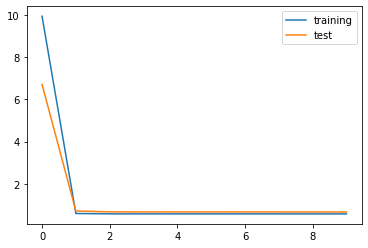

In [303]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [304]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    _ , y_pred = model(X_test)
    score = accuracy_score(y_test, y_pred)
    print(score)

0.6458333333333334
